# From Tea leaves to Algorithms: Predicting Health Costs using Linear Regression

## Introduction

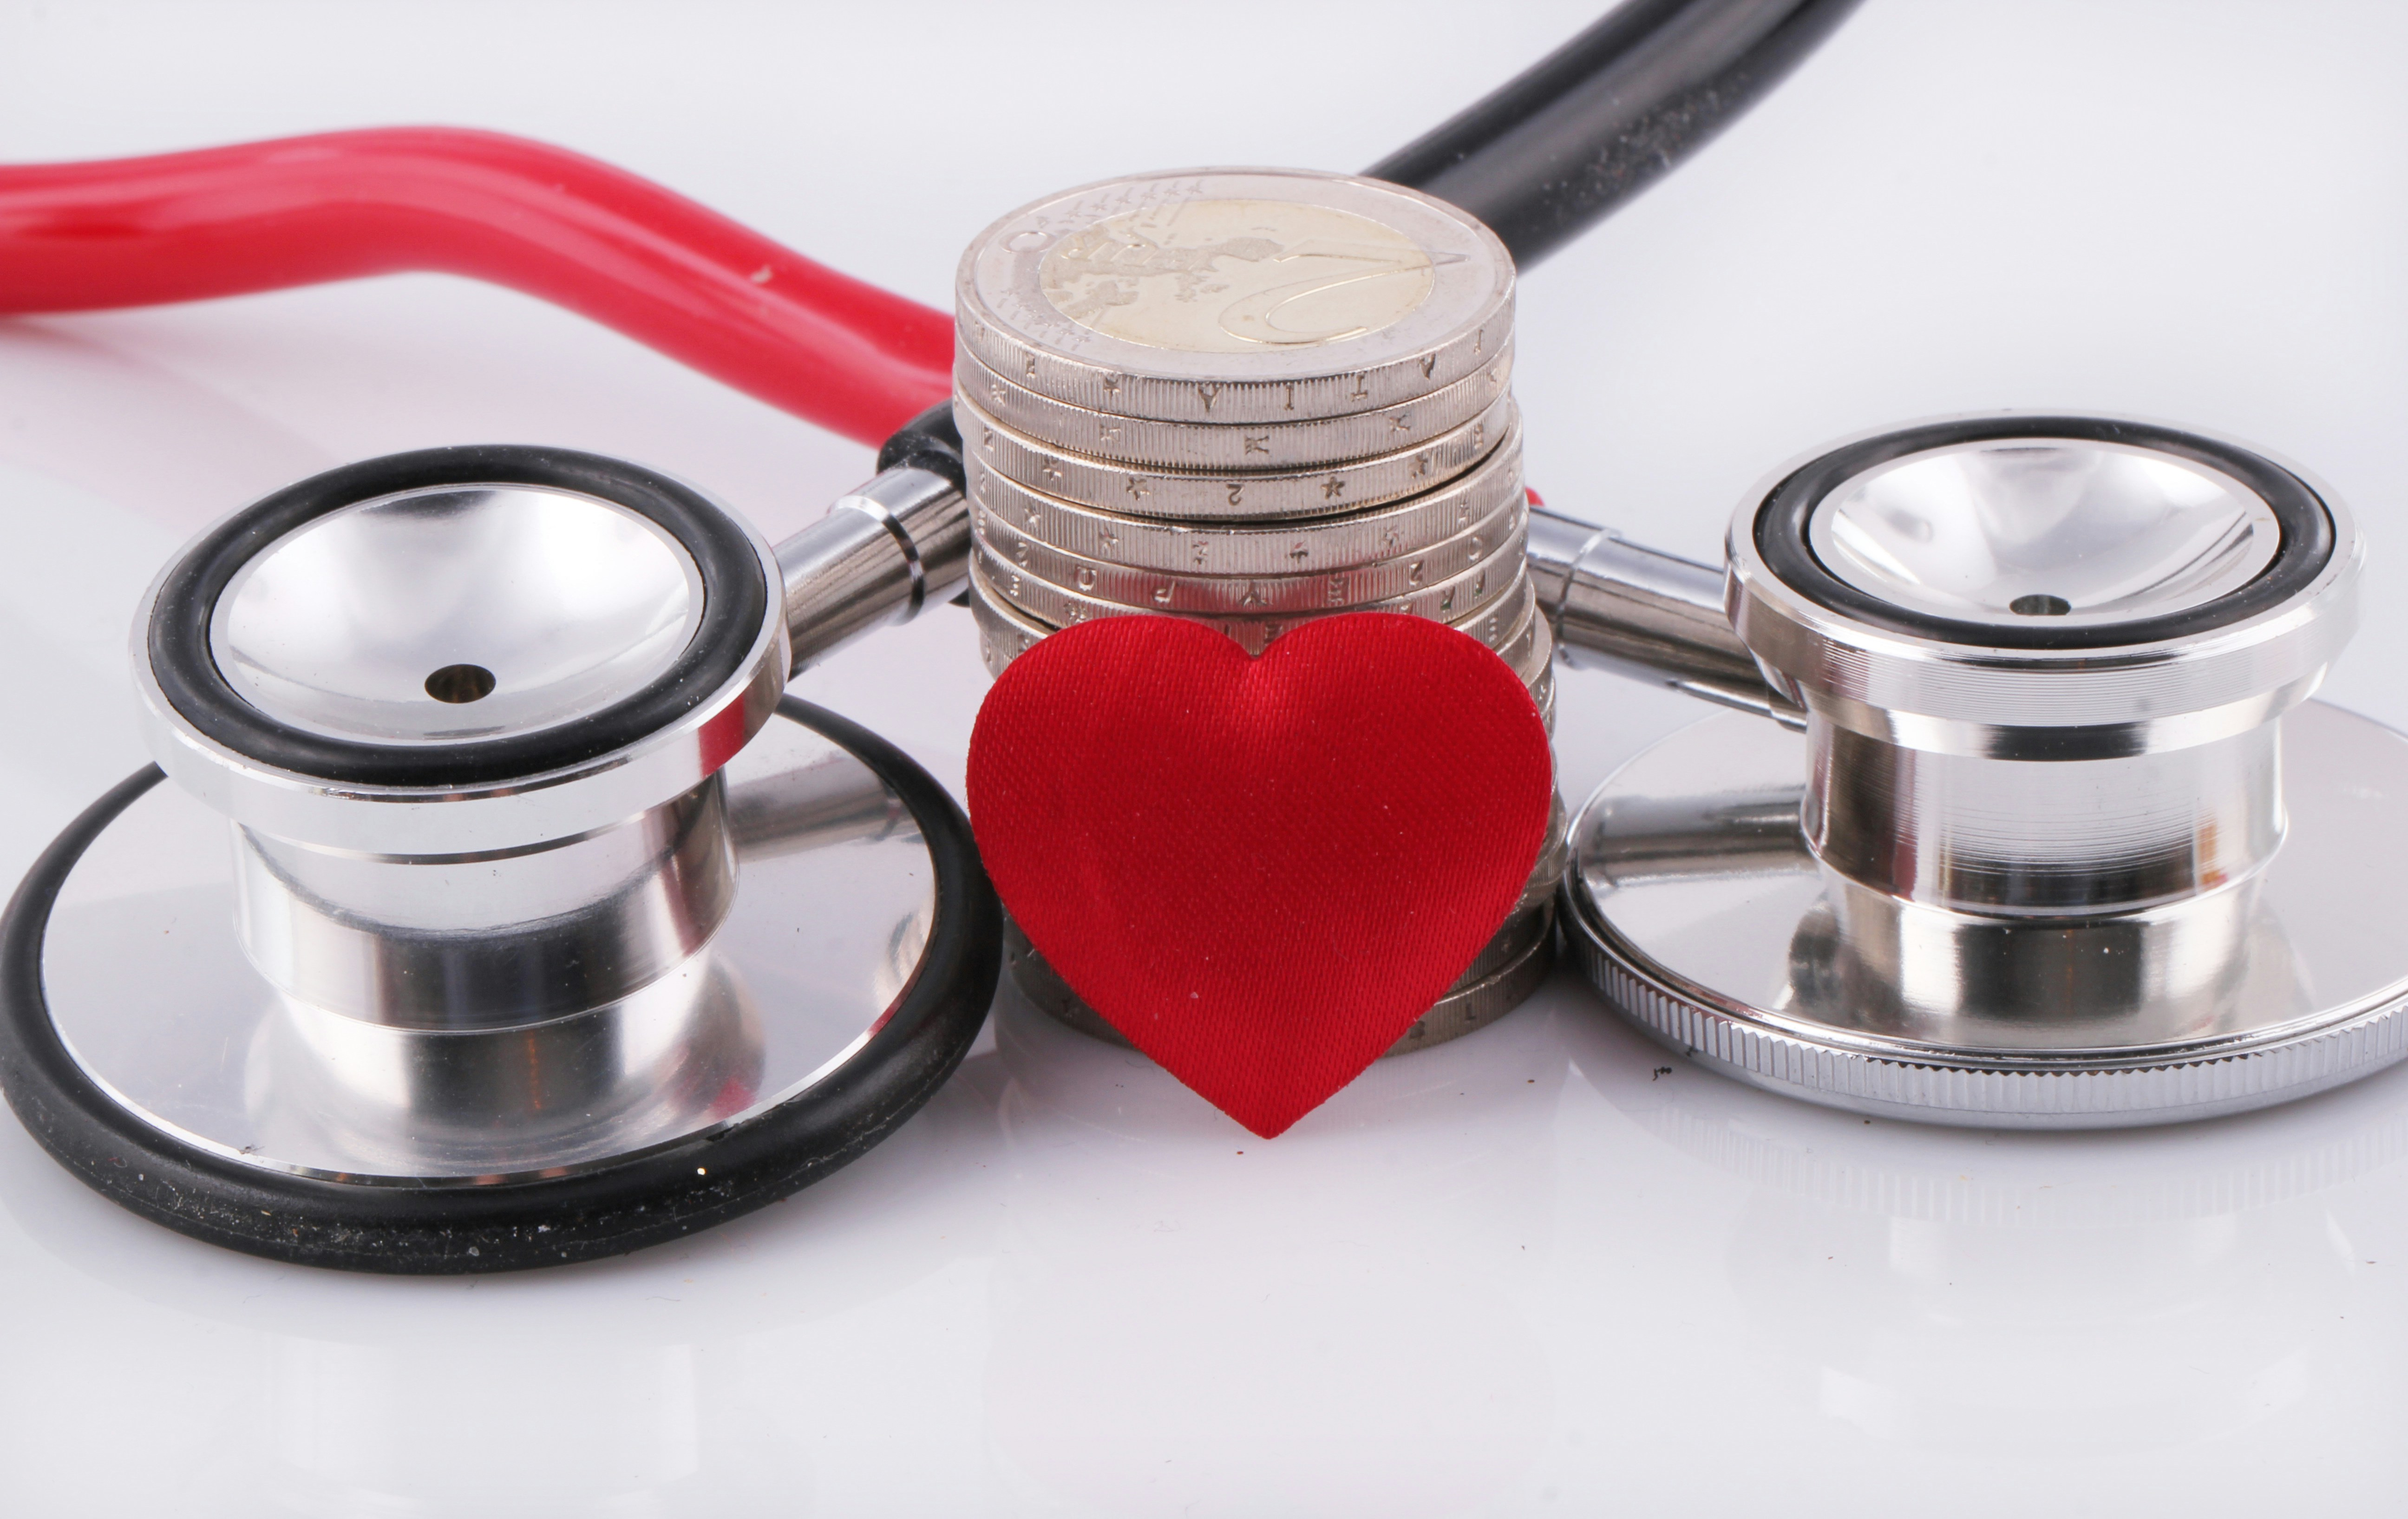
Photo by <a href="https://unsplash.com/@jccards?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Marek Studzinski</a> on <a href="https://unsplash.com/photos/a-stethoscope-with-a-red-heart-on-top-of-it-B9E3-UtEgXg?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

Costs for hospital maintenance can often be quite significant. Hospitals need to plan well ahead to determine the different sources of revenue to engage the costs that come up. Patient visits and operations are a regular source of income for hospitals. Therefore, being able to predict costs for future patients would help to determine future revenue.

Machine learning provides a solution for this by the use of models that can predict costs of patients based on various parameters associated to patients. One such model can be generated using Linear Regression algorithm. The algorithm helps to predict the cost associated to a patient based on data from previous patient history.
Once the model is in place, the costs associated to any new patient can be determined by passing on specific data linked to the patient. The model would then come up with an estimated cost for that patient.

In this project, we shall make use of a Linear Regression modelling to determine the estimate cost of treatment for a patient based on various models. The models will be generated using data from a [Medical Cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) which has been made available on Kaggle.  

## Linear Regression Modelling

### Introduction to Linear Regression

Linear regression modelling is a statistical technique used to quantify the relationship between two or more variables. The goal is to predict the value of a dependent variable based on one or more independent variables by fitting a linear equation to the observed data. The modelling technique assumes a linear relationship between the variables, where changes in the independent variables are associated with proportional changes in the dependent variable.

### Math behind Linear Regression

Being linear the relationship between the dependent and independent variables can be defined as:

$Y=\hat Y+\epsilon$ and

$\hat Y = f(X)$ where

$f(X)= \beta_0+\beta_1x_1+\beta_2x_2+...+\beta_nx_n$ 

Here $Y$ represents the actual values of the dependent variable. $\hat Y$ represents the predicted values of the dependant variable which is calculated as a function of the independent variables. Every unit change in the independent variable ($x_1, x_2...x_n$), considered on its own, has a numerical impact on the predicted outcome which is represented by ($\beta_1, \beta_2...\beta_n$). 

To understand this better, consider the following: 

if $\hat Y_1$ is the predicted value based on the value of single independent variable $x_1$ i.e.:
$\hat Y_1= \beta_0+\beta_1x_1$  and 

$\hat Y_2$ is the predicted value based on a unit increment of the value of the single independent variable i.e.:
$\hat Y_2= \beta_0+\beta_1(x_1+1)$

Then $\beta_1$ represents the change in the outcome when an independent variable changes by a single unit.i.e.
$\hat Y_2-\hat Y_1=\beta_1$.
$\epsilon$ represents the error between the actual value and predicted value of the dependent variable.The goal of the the linear regression model being generated must be to decrease the value of $\epsilon$. In order to do the same, the values of ($\beta_1, \beta_2...\beta_n$) represented by $\hat\beta$ must be calculated so that the error is less.

To make the above more relatable, we could use the data set as an example. The goal of this project is to figure out the cost a patient might incur based on various details associated to the patient. The details or features represent the independent variables ($x_1, x_2..$) etc. These features will be used to determine the value of a dependent variable, namely *charges*. A part of the dataset (assume 80%) will be used to generate the model and calculate the values of $\hat\beta$. Once the model has been generated, it will be used to come up with the values of *charges* for the remaining 20% of the dataset. These predicted values ($\hat Y$), will then be compared against the actual values ($Y$). The effectiveness of the model is determined by the $\epsilon$. 

Different models can be generated by using a single feature, multiple features or all features. Additionally, models can be generated by making it quadratic or polynomial. However these tend to increase the complexity of the model.

### Determining  $\hat\beta$

The core of what defines the model is the coefficients. Their values are what define the predicted value. 
Generation of the values are based on the concept of Ordinary Least Squares. The derivation of the formula used to calculate them requires understanding of the concepts of slope, differentiation, minima and partial differentiation. [This page](https://nandeshwar.in/100-days-of-deep-learning/what-is-linear-regression-with-derivation/) explains the derivation of the related formulas. Reference of the same helps to appreciate the process behind the generation of the coefficients.

### Judging the model

The quality of the model can be measured qualitatively using residual plots that help to visualize variance in the values of error in comparison to the predicted values. If the errors are evenly distributed along the 0 mark, it highlights a good model. Any other trend could be an early indicator of an inappropriate model.

To measure the quality of the model, quantitatively, measures such as $MSE$ (Mean Squared Error) and $RMSE$ (Root Mean Squared Error) are useful since they give a single measure that highlights the overall error in the module. Thus providing an absolute measure. A relative measure that can be used is $R^2$. It is a ratio of the variance of the predicted values compared against the overall variance of the dependent variable. 

$R^2 = \frac{ESS}{TSS}$

Where ESS represents Explained Sum of Squares and TSS represents Total Sum of Squares.
This value highlights the proportion of the variance in the dependent variable that is explained by the independent variables in the model.

A combination of all these methods help to judge whether a model is the right fit to predict data for a specific type of dataset.

## Reading the Data

As mentioned earlier, the dataset we shall be reading is related to the Medical Cost dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from matplotlib import rc
%matplotlib inline
import joblib
from IPython.display import display, Latex
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
#from prettytable import PrettyTable

In [2]:
def bold_print(a_string,a_value=None):
    """
    Boldens the output
    
    Args:
        a_string (string): String to be bolded
    """
    print("\033[1m"+a_string+"\033[0m")

In [3]:
col_names = []
insurance = pd.read_csv("insurance.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
numeric_cols = list(insurance.select_dtypes(exclude='object').columns)
category_cols = list(insurance.select_dtypes(include='object').columns)

Dataframe dimensions:
1338 rows, 7 columns





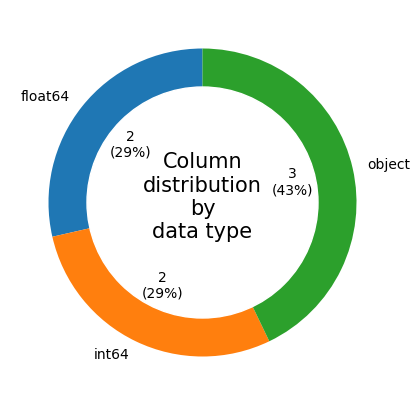

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Assignments
all_data_types = insurance.dtypes.to_list()
unique_data_types = list(set(all_data_types))
rows=insurance.shape[0]
columns=insurance.shape[1]
labels = [str(each_type) for each_type in unique_data_types]
values = [sum(insurance.dtypes == dtype) for dtype in labels]

#Printing the shape of the data frame
bold_print("Dataframe dimensions:") 
print(f"{rows} rows, {columns} columns")

#Generating the pie chart
fig,ax=plt.subplots(figsize=(10,5))

def get_absolute_val(pct,values):
    """
    Generates a list of absolute values from relative values to display the same in a pie chart.
    Values cannot be directly set as list because the autopct parameter expects either a format string or a function.
    
    Args:
        pct(list): Percentage-wise break down of categories in the pie chart as provided by ax.pie
        values(list):  Absolute count of each category

    Returns:
        fstring: Absolute count of each category returned as fstring
    """
    print()
    absolute_val=int(np.round(pct/100*np.sum(values)))
    return f'{absolute_val}\n({pct:.0f}%)'
    
ax.pie(values, labels=labels,
       startangle=90,
       autopct=lambda pct: get_absolute_val(pct,values))
circle = plt.Circle((0,0),0.75,color='white')
ax.add_artist(circle)
ax.text(s="Column\ndistribution\nby\ndata type",x=0,y=-0.23,size=15,ha='center')
plt.show()

insurance.dtypes

- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs billed by health insurance

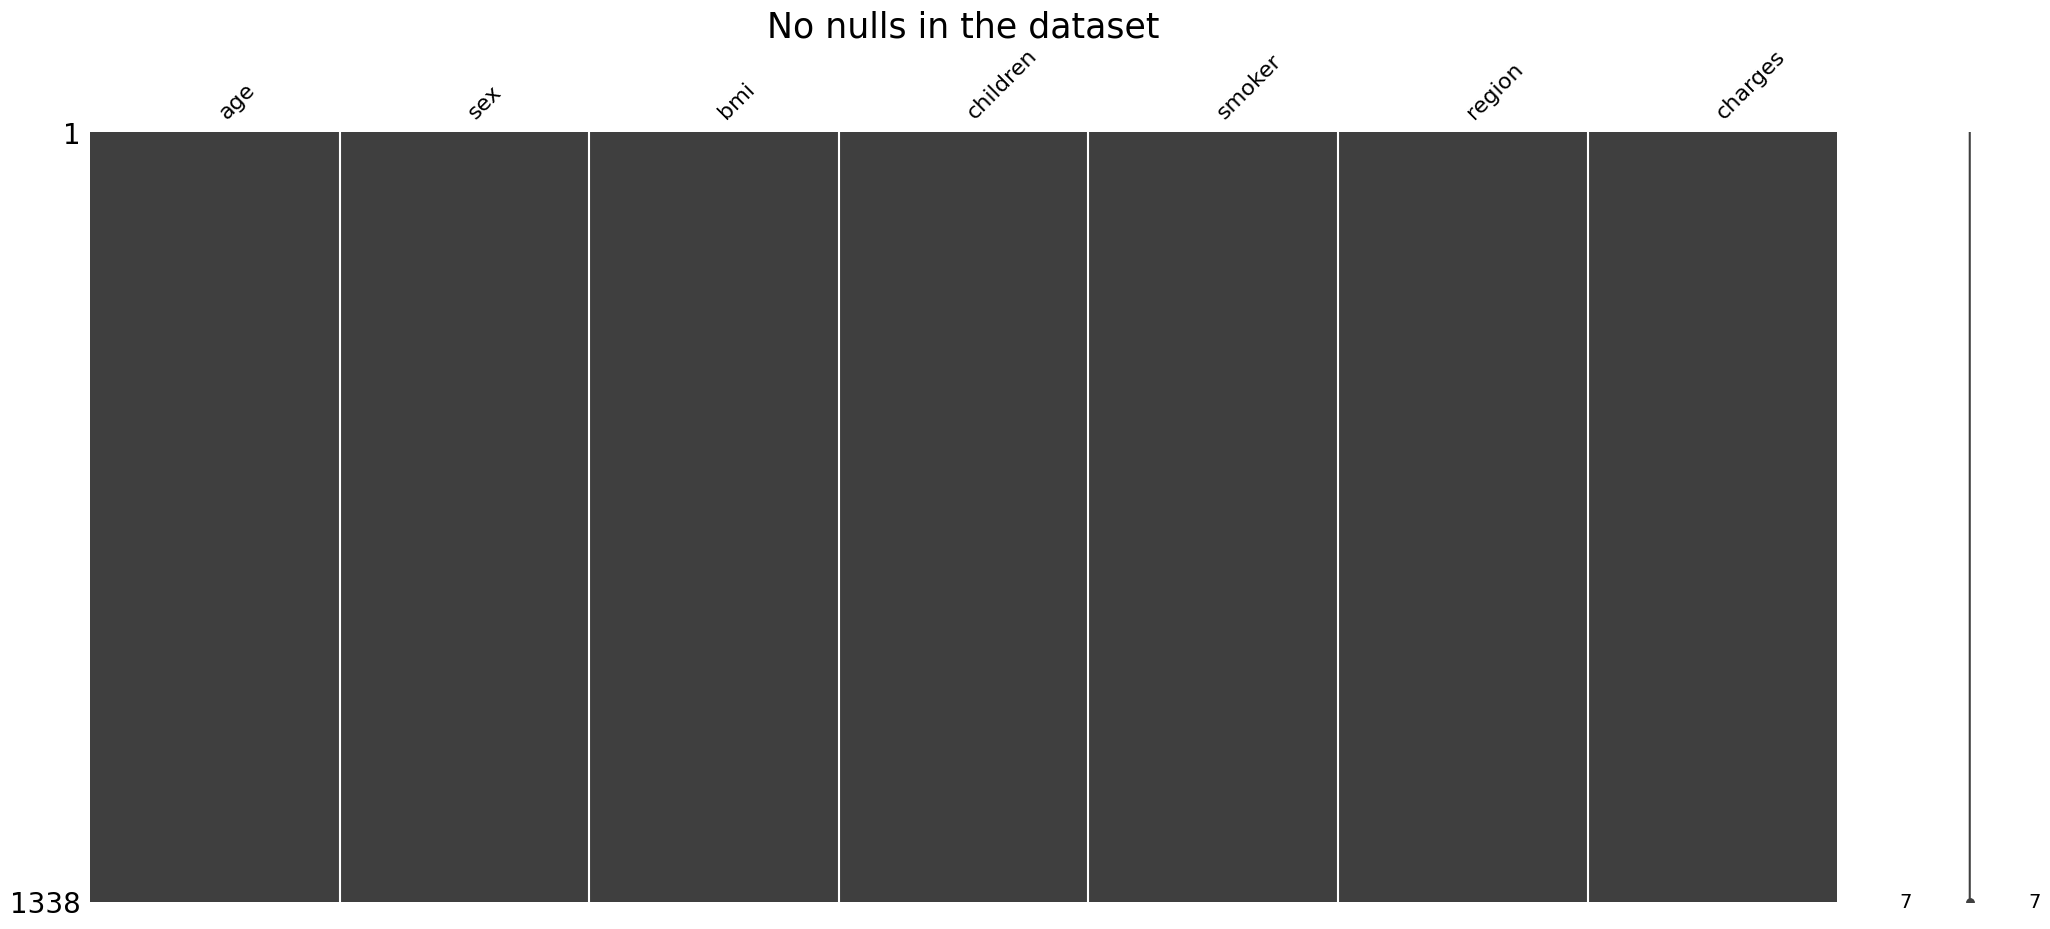

In [6]:
msno.matrix(insurance)
plt.title("No nulls in the dataset", size=25)
plt.show()

Based on an initial analysis of the dataset, there seems to be an absence of null values. A significant number of columns are numeric. The non-numeric columns will require transformation before they can be processed.

Clearly, the independent or feature column will be all columns except *charges*. *Charges* will be the target column that the model will attempt to predict.

## Relationship Patterns
**Identifying features that are most correlated to each other**

Using correlation, we shall try to identify columns that may be related. We could use these columns later, to identify whether their use impacts the models we generate.

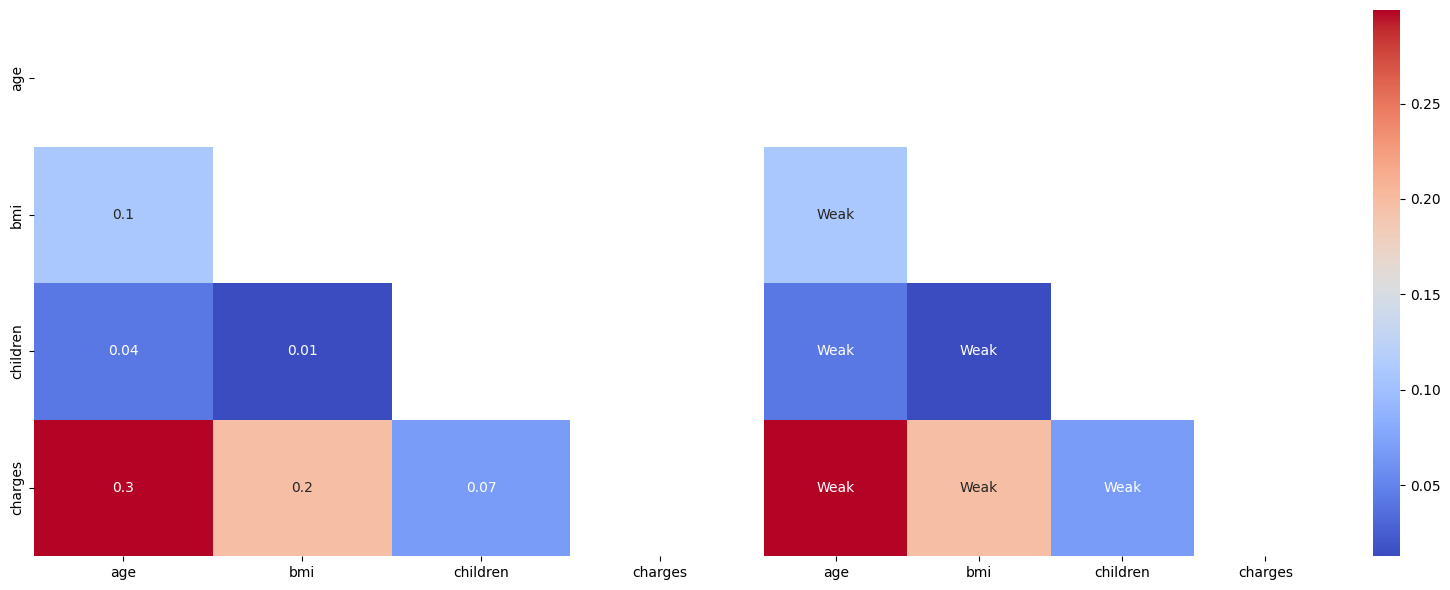

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlations = insurance[numeric_cols[:]].corr()

# Define a mask to identify the upper triangle
mask = np.triu(np.ones_like(correlations))

# Generate the correlation plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(correlations, annot=True, mask=mask, ax=ax1, cbar=False, cmap='coolwarm', fmt=".1g")

# Define a mask to highlight the variables with strong correlation
absolute_mask = np.abs(correlations) > 0.3
annotation_text = np.where(absolute_mask, "Strong", "Weak")
annotation_text = np.where(correlations == 1, "", annotation_text)  # Remove annotation for self-correlation

# Generate plot indicating columns with strong correlation
sns.heatmap(correlations, annot=annotation_text, mask=mask, fmt="", ax=ax2, yticklabels=False, cmap='coolwarm')

plt.tight_layout()
plt.show()

Strong correlations are considered to be anything greater than 3 or less than -3. Clearly, none of the columns seem to correlate to the dependent column, i.e. charges. It is interesting to see that some of the columns that were assumed, by me, to directly impact charges failed to do so. The assumption was mainly around columns like *age* and *bmi* which were expected to have strong correlations.

We shall explore this a little more by considering how the target columns are spread across *age* and *bmi* columns.

In [8]:
def generate_groupby_boxplot(df,groupby_col,target_col):
    fig = plt.figure(figsize=(12,5))
    ax=fig.add_subplot(1,1,1)
    df.boxplot(column = [target_col], by = groupby_col, ax=ax)
    ax.set_title(f"{target_col.title()} across {groupby_col.title()}")
    ax.set_xlabel("")
    fig.suptitle("")
    plt.show()

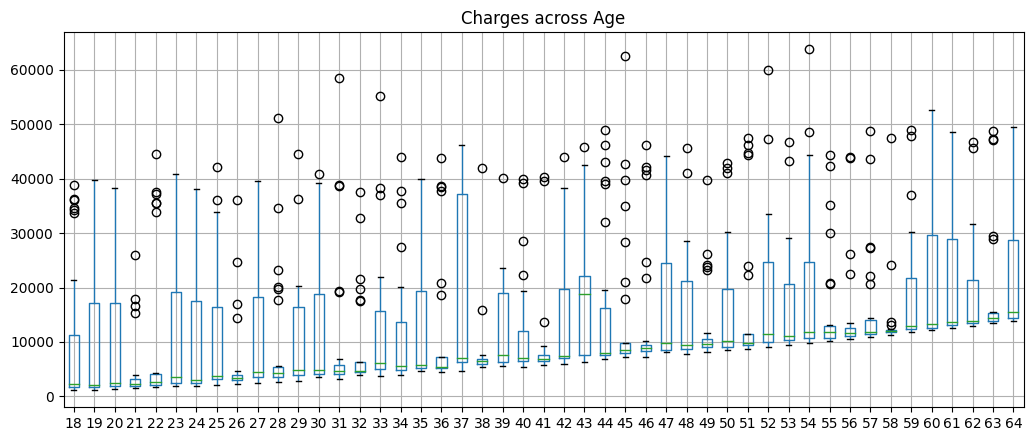

In [9]:
generate_groupby_boxplot(insurance,"age","charges")

While the median charges keep rising as the age increases, each age has many outliers, this may be the reason behind the lack of correlation with age and charges.

In [10]:
bmi_categories = {
    18.5: 'Underweight',
    25: 'Normal weight',
    30: 'Overweight',
    40: 'Obese'
}

In [11]:
insurance['bmi_category']=insurance['bmi'].apply(lambda bmi: next((v for k, v in bmi_categories.items() if bmi < k), 'Overly obese'))
insurance['bmi_category']=pd.Categorical(insurance['bmi_category'],categories=['Underweight','Normal weight','Overweight','Obese','Overly obese'])

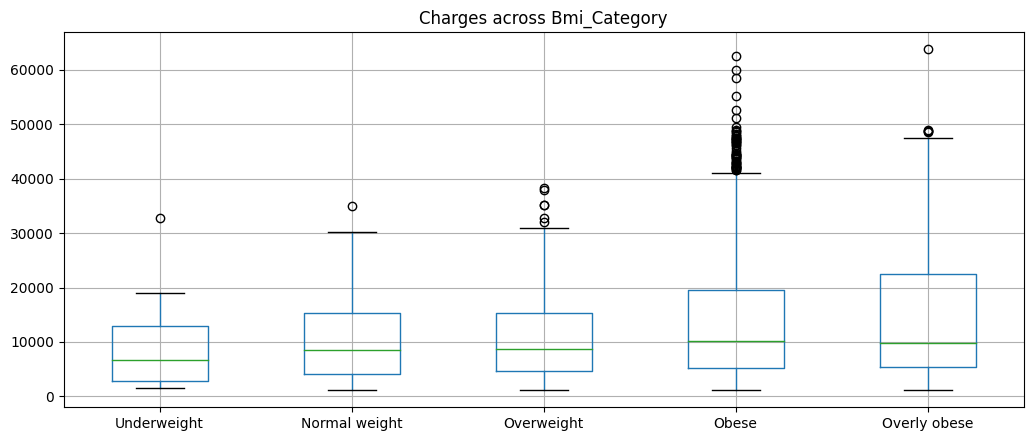

In [12]:
generate_groupby_boxplot(insurance,"bmi_category","charges")

BMI is a continuous value, however, here we have categorized the values in to the standard BMI categories and attempted to classify the *charge* values based on the categories they fall in. As with *age* the value of charges increases depending on the BMI, however outliers especially in the *Overweight*, *Obese* and *Overly obese* categories seem to prevent the possibility of a correlation between *charges* and *bmi*.

## Detailed Data Study
**Identifying data distribution for each column**

We shall move further to understand the distribution of data across every column. This could help us to understand and interpret the model generated better.

In [13]:
def generate_data_distribution(df, cols, plot_title):
    """
    Visual analysis of n columns associated to a dataset. 
    It is recommeded to limit the number of columns to 5 to ensure that the visual fits the screen size.
    
    Args:
        dataset(dataframe): Dataset for which analysis will be done
        cols(list): Names of the columns to be analysed
        plot_title(string): Title for the entire plot
    """
    fig = plt.figure(figsize=(15,10))
    color=sns.color_palette('Set1').as_hex()

    for i,col_name in enumerate(cols):
        #For histplot
        ax=fig.add_subplot(2,5,i+1)
        for keys,vals in ax.spines.items():
            if keys!='bottom':
                ax.spines[keys].set_visible(False)
        ax.xaxis.tick_top()

        mean=np.mean(df[col_name]).round()
        std_dev=np.std(df[col_name]).round()
        min=np.min(df[col_name]).round()
        max=np.max(df[col_name]).round()

        chosen_color=color[random.randint(0,8)]
        sns.histplot(data = df[col_name], color=chosen_color,
                 kde=True,line_kws={'lw':1,'ls':'-.',},
                 ax=ax)
        ax.set_title(str.upper(col_name),fontsize=9)
        ax.tick_params(axis="x",labelsize=8)
        ax.tick_params(axis="y",labelsize=8)
        ax.set_xlabel(None)
        ax.legend([f'$\mu$ = {mean}, $\sigma$ = {std_dev}', f'min = {min}, max = {max}'], 
                  handlelength=0,
                 fontsize='small',loc='upper right', bbox_to_anchor=(1, -0.02))#bbox_to_anchor=(1, 1)

        #For boxplot
        ax1=fig.add_subplot(2,5,i+6)
        for keys,vals in ax1.spines.items():
            if keys!='bottom':
                ax1.spines[keys].set_visible(False)
        #ax1.xaxis.tick_top()
        df[[col_name]].boxplot(color=chosen_color)
        ax1.tick_params(axis="x",top=False,labelsize=8)
        ax1.tick_params(axis="y",labelsize=8)
        ax1.set_xlabel('')
        

        if (i==0):
            ax.set_ylabel("Frequency")
        else:
            ax.set_ylabel(None)
        
        if i==5:
           ax1.set_ylabel("Frequency")
        else:
            ax1.set_ylabel(None)

    plt.suptitle(plot_title, size=15)
    plt.show()

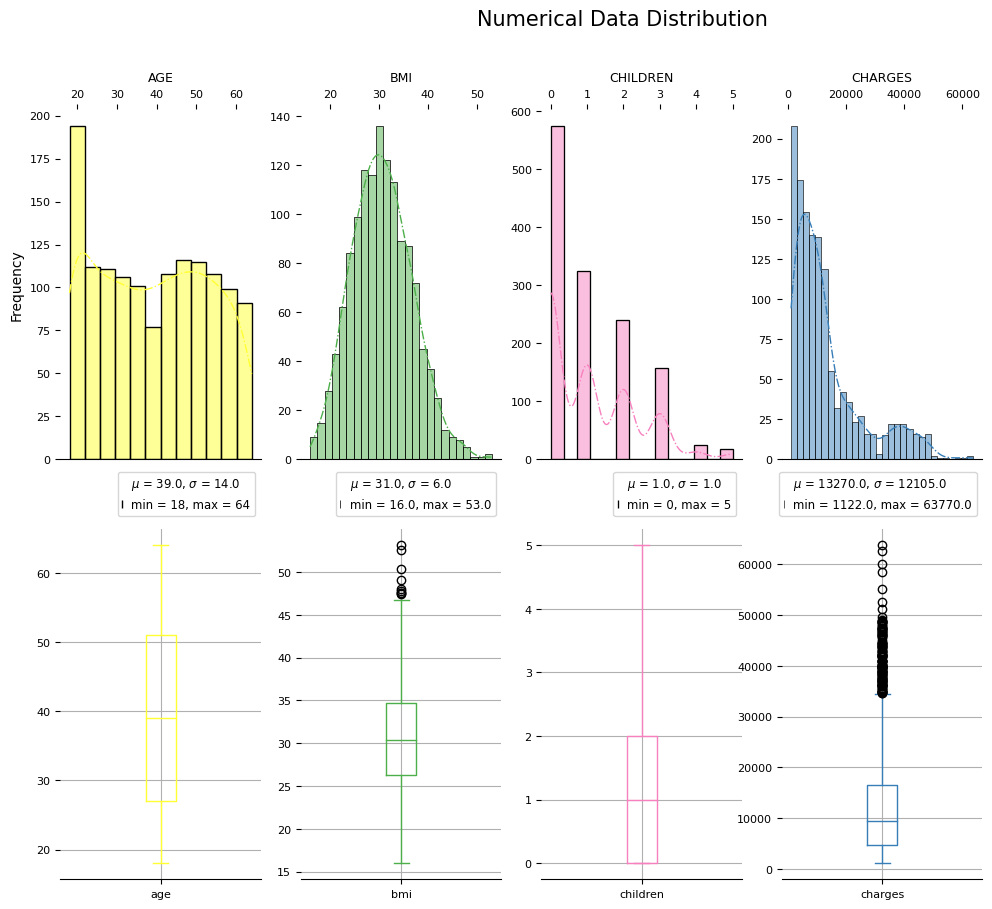

In [14]:
generate_data_distribution(insurance, numeric_cols[:], "Numerical Data Distribution")

A couple of points that must be noted from the above visual are:
- The dataset does not consider children or seniors. The age range is focussed on those between 18-64
- BMIs of all categories are represented in the column. However, the distribution is normal.
- *charges* are clearly left skewed. Outliers are significant.

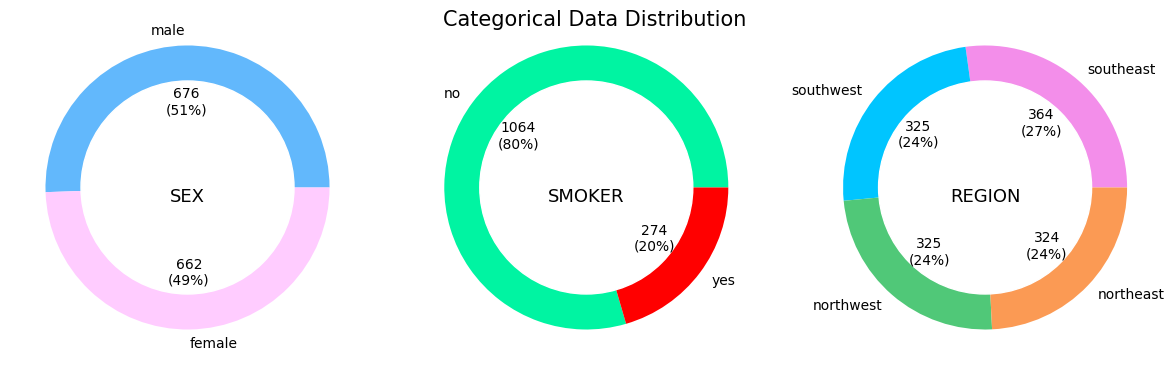

In [15]:
fig,ax1=plt.subplots(1,3,figsize=(12,8))
col_color_palette={'sex':['#62B8FC','#ffccff'],
                   'smoker':['#00F4A2','#FF0000'],
                   'region':['#F38EEA','#00C5FF','#50C878','#FB9A54'],
                  }
for i,each_col in enumerate(category_cols):
    values=insurance[each_col].value_counts().values
    labels=insurance[each_col].value_counts().index
    #Pie chart
    ax1[i].pie(values,labels=labels,
              autopct=lambda pct: get_absolute_val(pct,values),
              colors=col_color_palette[each_col])
    
    #Circle to generate donut chart
    circle=plt.Circle((0,0), 0.75, color='white')
    ax1[i].add_patch(circle)
    
    ax1[i].text(s=str.replace(str.upper(each_col),'_','\n'),
                x=0,y=-0.1,
                size=13,ha='center')

plt.suptitle("Categorical Data Distribution", size=15, y=0.7)
plt.tight_layout()
plt.show()

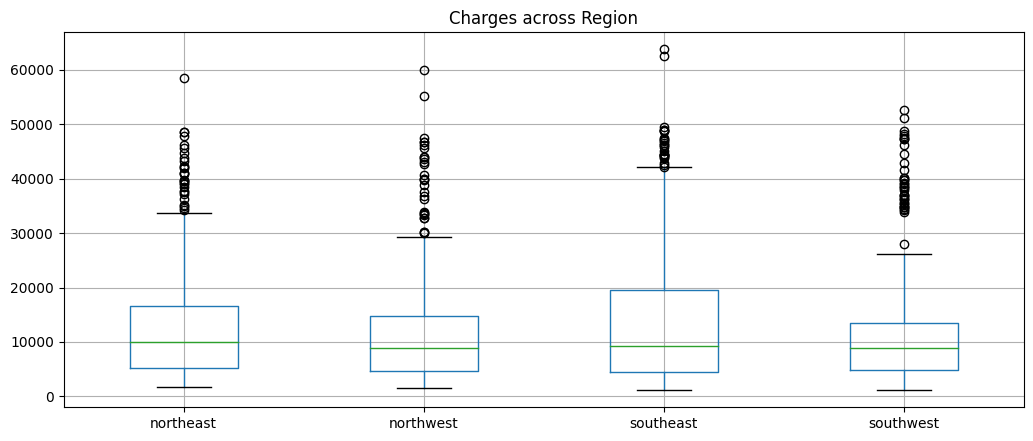

In [16]:
generate_groupby_boxplot(insurance,"region","charges")

In [17]:
bold_print("Average charges across regions")
insurance.groupby('region')['charges'].mean().round(2).map(lambda x: f"${x:,}")

Average charges across regions


region
northeast    $13,406.38
northwest    $12,417.58
southeast    $14,735.41
southwest    $12,346.94
Name: charges, dtype: object

- The median and average charges across all regions are nearly the same which prevents this from being considered as a candidate for model generation.

Linear regression is a mathematical model that depends on the use of numerical values to generate the model. Categorical columns, therefore, require a transformation that enables their use in the model. The usual [transformations](https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b) include one-hot encoding, label-encoding etc. 

In the case of the *regions* column since there are four regions, we would use one hot-encoding to transform the column and create dummy columns that represent each region. However, as seen earlier from the pie chart visual and the box-plot visual, the distribution of charges across regions are not significant enough to warrant their use. They do no cause significant change in the average of charges, as they are equally distributed across all charges. 

The same trend does not hold for the *smokers* column where the charges are unequally distributed, therefore the average charges across both categories are significantly different. The change in the smoker type has significant change in the average charges, which has noticeable impact on the model.

## Creating Black boxes
**Generating Models**

Now that we understand the contents of the dataset and which columns could be candidates for the generation of the model, we shall proceed to generate various models while assessing their effectiveness based on the metrics mentioned earlier.

### Preparing for model generation

We shall be splitting the data in to three datasets namely training data, testing  data and validation data. The training data will be used to train and generate the model. The testing data set will be used to test the model and generate the metrics used to evaluate the model. The validation dataset will be used to generate results for the selected model. In real-world scenarios, the validation dataset will be production data.

Training data will make use of 70% of the dataset. The testing and validation datasets will be 15% respectively of the entire dataset.

In [18]:
regression_result=pd.DataFrame(columns=['model','rmse','r2score','plot_color'])

In [19]:
selected_cols=['smoker','age','bmi','children','charges']
insurance_selected_cols = insurance[selected_cols].copy()
insurance_selected_cols['smoker']=insurance_selected_cols['smoker'].apply(lambda value:1 if value=='yes' else 0)

# rmse_dict={}
# r2score_dict={}

# activate latex text rendering
#rc('text', usetex=False)

X = insurance_selected_cols[['smoker','age','bmi','children']]
y = insurance_selected_cols['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)
X_test, X_validate, y_test, y_validate = train_test_split(X_test,y_test,test_size=0.5,random_state=43)

In [20]:
class insurance_LinearReg:
    def __init__(self, X_train, y_train, X_test, y_test, columns, model_name, y_transformed=0):
        self.X_train=X_train[columns]
        self.X_test=X_test[columns]
        self.y_train=y_train
        self.y_test=y_test
        self.y_pred=[]
        self.model_name=model_name
        self.columns=columns
        self.intercept = 0.00
        self.coefficients = []
        self.mse = 0.00
        self.rmse = 0.00
        self.r2score = 0.00
        self.residuals = []
        self.y_transformed = y_transformed
        self.plot_color= "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

        if self.y_transformed == 1:
           self.y_train = np.log2(self.y_train)
           self.y_test = np.log2(self.y_test)
        
        model = LinearRegression()
        model.fit(self.X_train,self.y_train)
        joblib.dump(model, model_name.lower().replace(' ','_')+'.pkl')
        
        self.intercept = model.intercept_.round(2)
        self.coefficients = model.coef_.round(2)

        self.y_pred = model.predict(self.X_test)
        self.residuals = self.y_test-self.y_pred

        self.mse = mean_squared_error(self.y_test,self.y_pred)
        self.rmse = mean_squared_error(self.y_test,self.y_pred,squared=False)
        
        if self.y_transformed == 1:
             self.mse = np.exp(mean_squared_error(self.y_test,self.y_pred))
             self.rmse = np.exp(mean_squared_error(self.y_test,self.y_pred,squared=False))
        self.r2score = r2_score(self.y_test,self.y_pred)
        
    def get_intercept(self):
        return self.intercept
    def get_coefficients(self):
        return self.coefficients
    def get_mse(self):
        return self.mse
    def get_rmse(self):
        return self.rmse
    def get_r2_score(self):
        return self.r2score
    def get_plot_color(self):
        return self.plot_color
        
    def display_model(self):
        equation_string = "\hat y=\\beta_{0}"
        equation_num_string = f"\hat y={self.intercept}"

        for i in range(len(self.coefficients)):
            equation_string+=f"+\\beta_{{{self.columns[i]}}}x_{{{self.columns[i]}}}"
            equation_num_string+=f"+{self.coefficients[i]}x_{{{self.columns[i]}}}"

        formattedName=self.model_name.lower().replace(' ','\\_')
        display(Latex(f"$\\text{{Model: }}\\text{{{formattedName}}}$"))
        #display(Latex("$\\text{Model: }\\text{" + model_formatted_name + "}$"))
        display(Latex(f'${equation_string}$'))
        display(Latex(f'${equation_num_string}$'))

    def display_residual(self):
        fig,ax=plt.subplots(1,1,figsize=(10,5))
        ax.scatter(self.y_pred, self.residuals,c=self.plot_color)
        ax.axhline(y=0,ls='--')

        ax.set_xlabel("Prediction($)")
        ax.set_ylabel("Residuals")
        if self.y_transformed == 1:
             ax.set_xlabel("Log_applied_Prediction")
             ax.set_ylabel("Log_applied_Residuals")
        ax.set_title(f"Residual plot for {self.model_name}")
        
        plt.show()    

In [21]:
def display_model_results(mse,rmse,r2score,y_transformed=0):
    bold_print(f"{'MSE':<14} {'RMSE':<16} {'R2_Score':<10}")
    print("-" * 14, "-" * 16, "-" * 10)
    if y_transformed==1:
       print(f"{mse:<14,} {rmse:<16,} {r2score:<10}")
    else:
       print(f"${mse:<14,} ${rmse:<16,} {r2score:<10}")

In [22]:
def print_model_report(model,y_transformed=0):
    model.display_model()
    print('\n')
    mse=model.get_mse().round(2)
    rmse=model.get_rmse().round(2)
    r2score=model.get_r2_score().round(2)
    display_model_results(mse,rmse,r2score,y_transformed)
    model.display_residual()

In [23]:
def generate_model_and_results(model_name, columns, X_train, y_train, X_test, y_test):
    model=insurance_LinearReg(X_train, y_train, X_test, y_test,
                             columns,
                             model_name)
    print_model_report(model)
    rmse=model.get_rmse()
    r2score=model.get_r2_score()
    plot_color=model.get_plot_color()
    return [model_name,rmse,r2score,plot_color]

### Model: Using the *smoker* column only

This model will be generated using the smoker column alone. The assumption when generating this model is that smoking influences health charges significantly, especially because it is commonly drilled in that smoking is injurious to health. We shall verify how well a model focused exclusively on smoking shines light to that truth.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



MSE            RMSE             R2_Score  
-------------- ---------------- ----------
$54,067,610.15  $7,353.07         0.64      


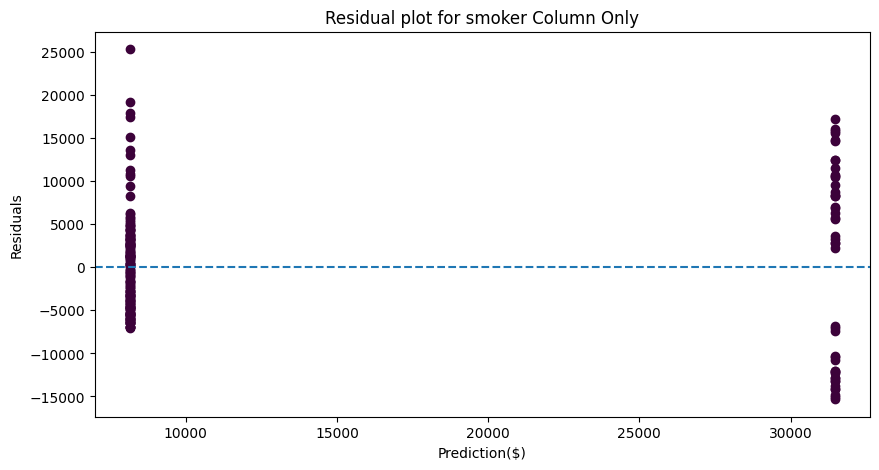

In [24]:
regression_result.loc[len(regression_result.index)]=generate_model_and_results("smoker Column Only", ['smoker'], X_train, y_train, X_test, y_test)

The intercept $\beta_0$ highlights the predicted charge when the record is associated to a non-smoker. The predicted value has an additional $23,299 when the record is associated to a smoker. Given that the model only uses the *smoker* column, it is appreciable that it explains, to a certain degree, the variability between actual and predicted values even though the predictions do not zero out against the actual values.

---

### Model: Using All Numeric Columns including *smoker*

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



MSE            RMSE             R2_Score  
-------------- ---------------- ----------
$35,330,128.61  $5,943.92         0.77      


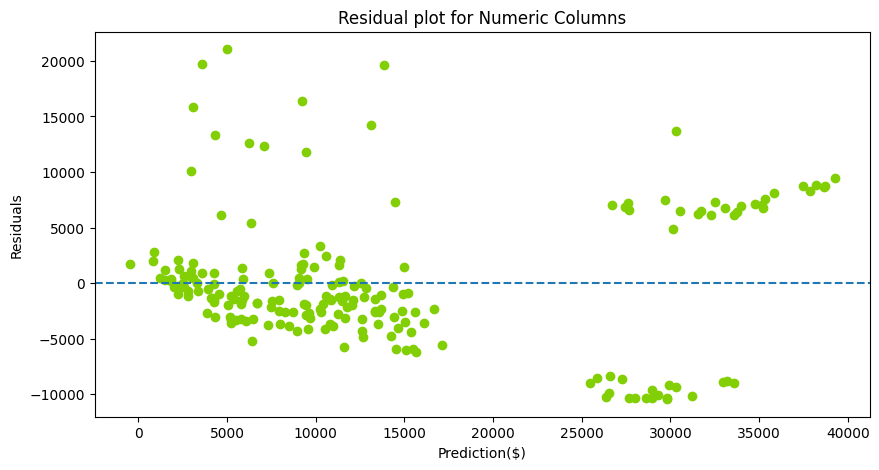

In [25]:
model_name="Numeric Columns"
columns=['smoker','age','bmi','children']
regression_result.loc[len(regression_result.index)]=generate_model_and_results(model_name, columns, X_train, y_train, X_test, y_test)

This model has done comparatively better than the last model with respect to the $R^2$ score. However, the residuals still fail to approach zero. The impact of the inclusion of the column *smoker* is clearly visible, with there being a visible separation between the lower and higher residuals.

---

### Model: Polynomial Model

While the inclusion of polynomials makes the model more complex, the attempt is being made to understand whether it could improve the associated metrics. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



MSE            RMSE             R2_Score  
-------------- ---------------- ----------
$35,628,515.08  $5,968.96         0.77      


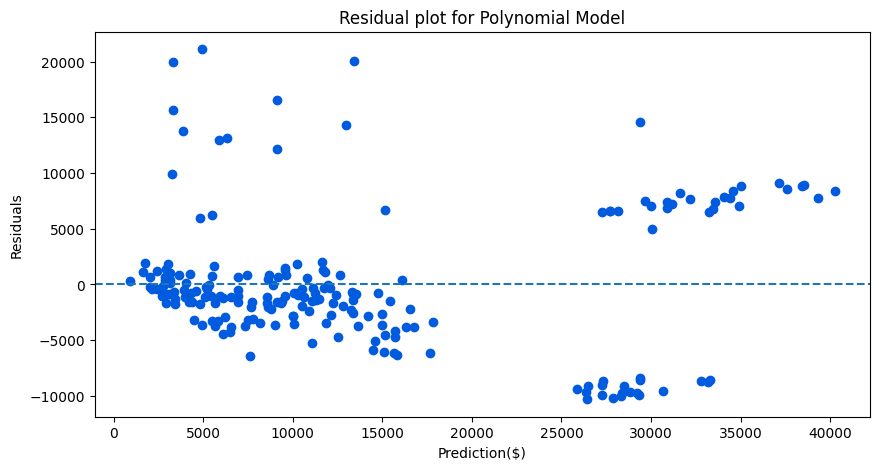

In [26]:
X_train['age_squared'] = X_train['age']**2
X_test['age_squared'] = X_test['age']**2

X_train['bmi_squared'] = X_train['bmi']**2
X_test['bmi_squared'] = X_test['bmi']**2

X_train['children_squared'] = X_train['children']**2
X_test['children_squared'] = X_test['children']**2

model_name="Polynomial Model"
columns=['smoker','age_squared','bmi_squared','children_squared']
regression_result.loc[len(regression_result.index)]=generate_model_and_results(model_name, columns, X_train, y_train, X_test, y_test)

Application of a polynomial equation has not significantly made any changes to the outcome when compared to the last model that was generated. Let us finally check the outcome when the column *smoker* is not considered.

---

### Model: Numeric Columns excluding *smoker* column

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



MSE            RMSE             R2_Score  
-------------- ---------------- ----------
$137,774,323.7  $11,737.73        0.09      


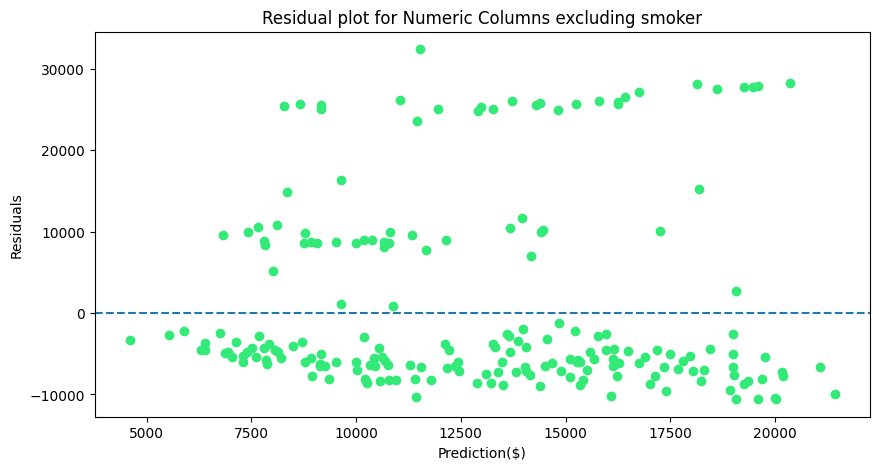

In [27]:
model_name="Numeric Columns excluding smoker"
columns=['age','bmi','children']
regression_result.loc[len(regression_result.index)]=generate_model_and_results(model_name, columns, X_train, y_train, X_test, y_test)

The model is significantly flawed, with high values in the $RMSE$ and $R^2$ values. The residual plot does not look to promising either with residual above 0 being spread all over. This model will definitely not be considered.

[Index](#Index)

## Top Model
**Assessing the best model generated**

Since we have generated multiple models, we shall now collate the metrics gathered around them and compare them to identify the best model.

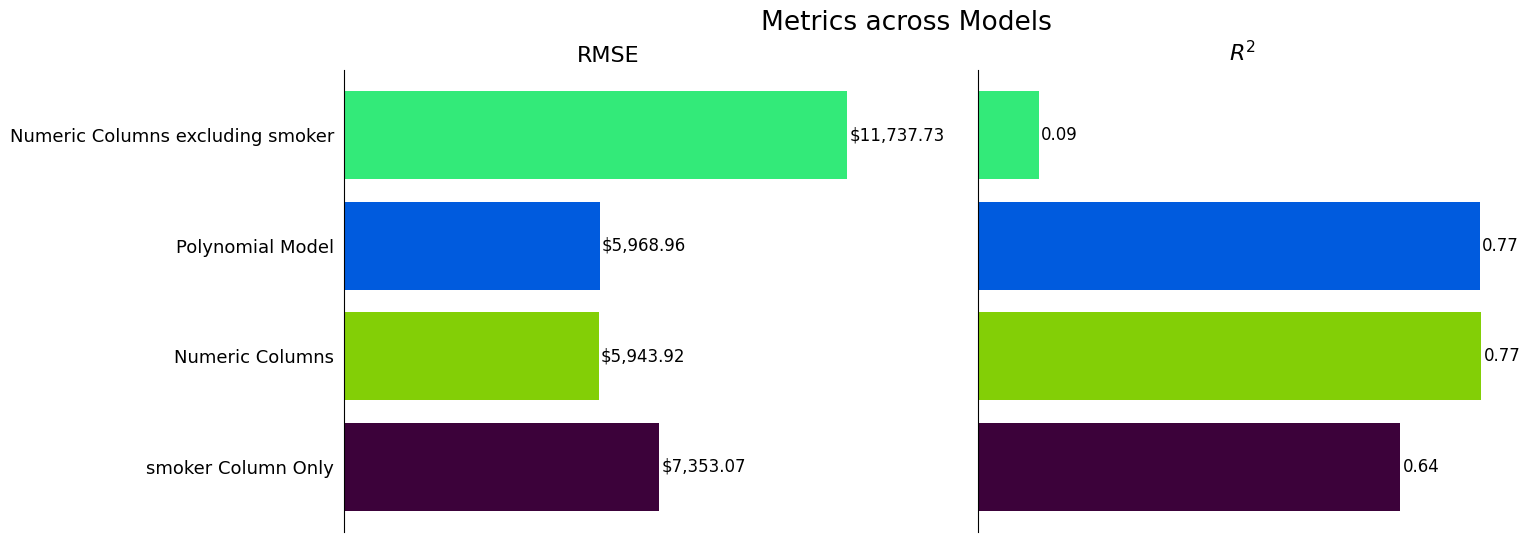

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for key,values in ax1.spines.items():
    if key!='left':
        ax1.spines[key].set_visible(False)
ax1.barh(regression_result['model'], regression_result['rmse'], color=regression_result['plot_color'])
ax1.set_xlabel('')
ax1.tick_params(axis="x",bottom=False,labelbottom=False)
ax1.tick_params(axis="y",labelsize=13, left=False)

for container in ax1.containers:
    ax1.bar_label(container, fmt='${:,.2f}', padding=1.5, fontsize='large')
ax1.set_title("RMSE",size=16)
       
    
for key,values in ax2.spines.items():
    if key!='left':
        ax2.spines[key].set_visible(False)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.barh(regression_result['model'], regression_result['r2score'],color=regression_result['plot_color'])
for container in ax2.containers:
    ax2.bar_label(container, fmt='{:.2f}', padding=1.5, fontsize='large')
ax2.tick_params(axis="x",bottom=False,labelbottom=False)
ax2.tick_params(axis="y",labelsize=8, left=False, labelleft=False)
ax2.set_title("$R^2$",size=16)

plt.suptitle('Metrics across Models',size=19)
plt.show()

Clearly, models with quantitative data, including the column *smoker* seem to do an excellent job. Not using the *smoker* column significantly impacts the prediction capability of a model. The use of a polynomial regression model does not significantly improve the model. Its impact compared to the best model is almost equal.

## The Outcome
**Verifying the effectiveness of the selected model**

Now that we have a model, we shall use the same against the validation dataset to understand the prediction capability of the model.

MSE            RMSE             R2_Score  
-------------- ---------------- ----------
$46,742,270.67  $6,836.83         0.74      


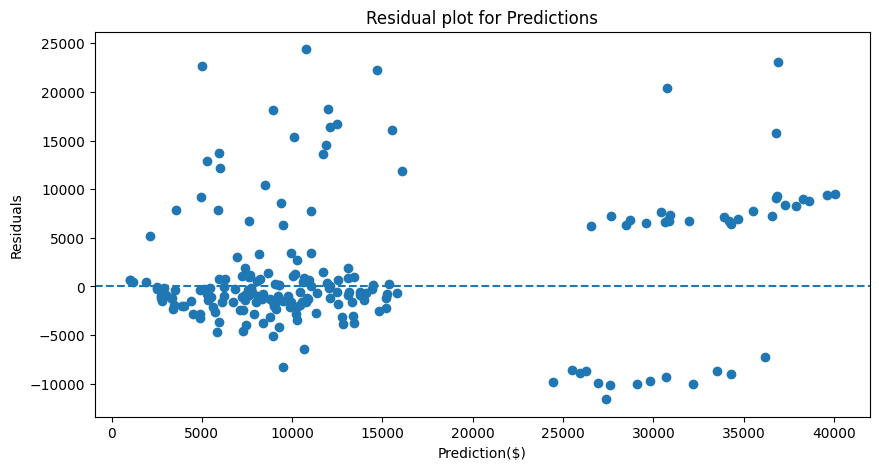

In [29]:
chosen_model=joblib.load('numeric_columns.pkl')

predictions=chosen_model.predict(X_validate)
validation_residuals=y_validate-predictions

validation_mse=mean_squared_error(y_validate, predictions)
validation_rmse=mean_squared_error(y_validate, predictions, squared=False)
validation_r2score = r2_score(y_validate,predictions)

display_model_results(validation_mse.round(2),validation_rmse.round(2),validation_r2score.round(2))

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.scatter(predictions, validation_residuals)
ax.axhline(y=0,ls='--')

ax.set_xlabel("Prediction($)")
ax.set_ylabel("Residuals")
ax.set_title(f"Residual plot for Predictions")
plt.show()

- The $RMSE$ and $R^2$ values after using the validation dataset seem close to the results obtained using the test data, albeit slightly less.
- Clearly the impact of the *smoker* column is visible, with non-smoker data showing comparatively greater proclivity to correct predictions in comparison to data records associated to smokers. However, it must be noted that the model is significantly trained on data for non-smokers which it reflects.
- While the model is able to explain the variance in the predicted values versus the actual values, overall the model is not fit to predict charges. Alternate models using Stochastic Gradient Descent or Decision Trees may be more appropriate.

## Conclusion

Predicting charges for a financial period is an important activity especially for hospitals and other related medical establishments to ensure that they have the necessary resources to meet the needs of patients. In this project we attempt to predict the medical charges using a patient dataset that maintains parameters such as age, BMI etc. Since this is a regression model, we attempt to create a linear regression model that can predict the charges a patient will incur depending on the parameters in the dataset.

Being a Linear Regression model, we attempted to measure the effectiveness of the model quantitatively using metrics such as $RMSE$ and $R^2$ and visually using residual plots which compare the predicted value against the residuals.

The model that was selected used all numeric columns, including *smoker*. The model was used to predict values for the *charges* column of the validation dataset. While the metrics delivered similar results to when testing data was used, the residual plot reveals that the predicted values do not zero-in with the actual values. Hence, it was decided to not move forward and consider other algorithms to deliver more robust predictions.

## Learnings

- [LaTex in Jupyter Notebook](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)
- [BMI Categorisation](https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/body-mass-index-bmi/)
- [Generating a random color on-the-go](https://stackoverflow.com/questions/28999287/generate-random-colors-rgb)
- [LaTex using Python code](https://stackoverflow.com/questions/4028267/how-to-render-latex-markup-using-python)
- [Understanding the derivation of linear regression coefficients](https://nandeshwar.in/100-days-of-deep-learning/what-is-linear-regression-with-derivation/)
- [Understanding the $R^2$ formula](https://statproofbook.github.io/P/rsq-der.html)
- [Understanding ESS which is used to calculate $R^2$](https://statproofbook.github.io/D/ess)
- [Normal equation and matrix calculus](https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/)
- [How to decide when to use Log transformation](https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers)
- [How to decide between using MAE or RMSE](https://stats.stackexchange.com/questions/48267/mean-absolute-error-or-root-mean-squared-error/210857#210857)
- [Converting back from Log before calculating RMSE](https://stats.stackexchange.com/questions/414499/should-i-convert-the-number-after-log-transformation-back-to-the-original-for-ca)
- [Formatting output text like titles using Latex](https://stackoverflow.com/questions/8376335/styling-part-of-label-in-legend-in-matplotlib)
- [Latex library for formatting text](https://matplotlib.org/2.0.2/users/usetex.html)